<a href="https://colab.research.google.com/github/Dexne/Artificial_Intelligence_Seminar/blob/main/08_Cuantizar_imagenes_con_K-Means/T%C3%A9cnicas_de_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Técnicas de clustering

Cuantizar imagen con K-means

In [1]:
# importamos librerias y modulos
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

Leemos la imagen

In [8]:
# leemos imagen y normalizamos
img = mpimg.imread('/content/frutas.jpg')
img = np.array(img, dtype=np.float64) / 255

In [38]:
# obtenemos el tamaño y definimos el número de clases
w, h, d = img.shape
n_classes = 8

In [39]:
# Redimensionamos
img_array = np.reshape(img, (w * h, d))

In [43]:
image_array_sample = shuffle(img_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters = n_classes)
kmeans.fit(image_array_sample)
labels = kmeans.predict(img_array)
print(labels)

[5 5 5 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
# vemos a que cluster pertenece y cambiamos por el pixel del centro
img_labels = np.reshape(labels, (w,h))
img_out = np.zeros((w,h,d))
label_idx = 0
for i in range(w):
  for j in range(h):
    img_out[i][j][0] = kmeans.cluster_centers_[img_labels[i][j]][0]
    img_out[i][j][1] = kmeans.cluster_centers_[img_labels[i][j]][1]
    img_out[i][j][2] = kmeans.cluster_centers_[img_labels[i][j]][2]

In [45]:
print(kmeans.cluster_centers_)

[[0.69019608 0.66443786 0.50179151]
 [0.67268908 0.09590336 0.08088235]
 [0.26072367 0.395189   0.12419648]
 [0.52900955 0.60442433 0.19544997]
 [0.84941176 0.42560224 0.15703081]
 [0.91484921 0.87987616 0.69895654]
 [0.90678286 0.77609296 0.23308642]
 [0.1479085  0.07441176 0.02424837]]


Representacion de los colores

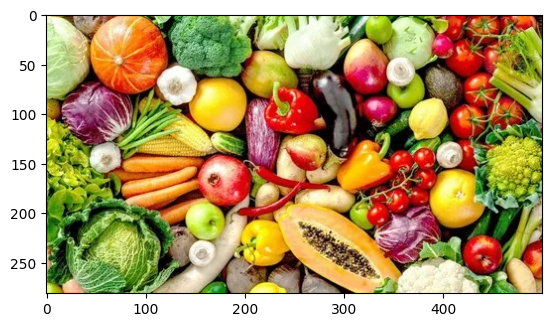

In [46]:
plt.imshow(img)

Visualizamos la imagen original

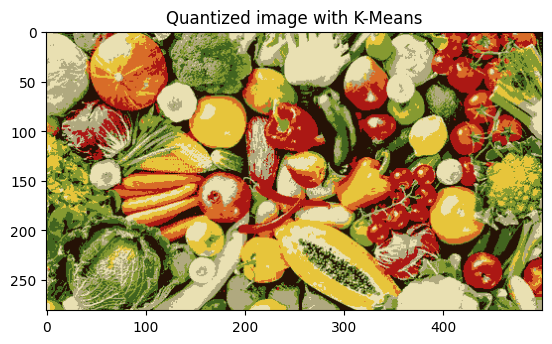

In [47]:
# imagen de salida, imagen cuantizada
plt.title('Quantized image with K-Means')
plt.imshow(img_out)